# New Section

In [1]:

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import nltk
from gensim.models import Word2Vec, KeyedVectors
import numpy as np
import pandas as pd
import sqlite3
import re
import os
import time
import matplotlib.pyplot as plt
#import nbconvert
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud ,STOPWORDS
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from nltk.tokenize import word_tokenize

In [4]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/My Drive/SM_FRIEND_NEWSDATA")
!ls

 authorshipattribution.ipynb	   pytest.ini
 BAAD16DATASET			   README.rst
 BACC1.csv			   requirements
 BACC2.csv			   samledata.csv
 bengali_stemmer		   setup.cfg
 bengali-stemmer-dev		   setup.py
 bengali_stemmer.egg-info	   stemmer.ipynb
 bengali_word2vec		   Stopwords.csv
 bengali_word2vec.model		   stopwordsnew.csv
 bn_glove.39M.300d.txt		   tests
 build				   try_w2v.ipynb
 cc.bn.300.vec			   ulm1.csv
'Copy of ulm_train.csv'		   ulm2.csv
 dist				   wbc.ipynb
 LICENSE			   word2vec.ipynb
'naivebias on bangla news.ipynb'  'word2veclast try.ipynb'
'new data.ipynb'


In [6]:
import pandas as pd
import glob
import os

# setting the path for joining multiple files
files = os.path.join("BACC*.csv")


# list of merged files returned
files = glob.glob(files)

print("Resultant CSV after joining all CSV files at a particular location...");

# joining files with concat and read_csv
data = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(data)

Resultant CSV after joining all CSV files at a particular location...
       class_id                                           sentence
0             1  ১ পৃথিবীতে ঢের দিন বেঁচে থাকে আমাদের আয়ু এখন ম...
1             1  প্রান্তরের পারে তব তিমিরের খেয়া নীরবে যেতেছে দ...
2             1  তোমার চোখের পরে তাহার মুখেরে ভালোবেসে এখানে এস...
3             1  যৌবনের সুরাপাত্র গরল মদির ঢালো নি অধরে তব ধরা ...
4             1  হাজার বছর ধরে আমি পথ হাঁটিতেছি পৃথিবীর পথে সিং...
...         ...                                                ...
27421        18  নূতন এবং খুব কম লোকেই উহা বুঝিতে পারে কিন্তু প...
27422        18  আনিয়াছে এমন কি যে স্পর্শ করিয়াছে তাহার গুণদোষ ...
27423        18  পর্যন্ত পারে না আমরা নিজেদের প্রতি বিশ্বাস হার...
27424        18  ভারতের ইতিহাস পাঠ করিলে জানা যায় ভারত বরাবরই ক...
27425        18  নিকট যে সকল পাশ্চাত্যদেশীয় প্রলোভন আসিয়া থাকে ...

[27426 rows x 2 columns]


In [7]:
data.shape

(27426, 2)

In [8]:
data.drop_duplicates(keep=False, inplace=True)

In [9]:
data.shape

(27306, 2)

In [10]:
pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 47.6 MB/s 
     |████████████████████████████████| 23.9 MB 66.9 MB/s 
     |████████████████████████████████| 965 kB 51.4 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [11]:
stopwords = pd.read_csv('stopwordsnew.csv')
#stopwords = pd.read_csv('got_stopword.csv')

def to_encode(bangla_word):
    return bangla_word.encode('utf-8')


def to_decode(bangla_word):
    return bangla_word.decode('utf-8')

set_stop = set(stopwords['words'].map(to_encode))

In [ ]:
from bengali_stemmer.rafikamal2014 import RafiStemmer
stemmer = RafiStemmer()

texts = data['text'].values

In [13]:
import re
def cleanhtml(sentence):
    cleanr = re.compile('/.*?')
    cleantext = re.sub(cleanr,' ',sentence)
    return cleantext
def clean_punct(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#|।|’|‘]', r'', sentence)
    cleaned1 = re.sub(r'[.|,|(|)|\|/]', r'', cleaned)
    cleaned = re.sub(r'[০|১|২|৩|৪|৫|৬|৭|৮|৯]', r'', cleaned1)
    cleaned1 = re.sub(r'[-|=]', r' ', cleaned)
    cleaned = re.sub(r'[A|B|C|D|E|F|G|H|I|J|K|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z|a|b|c|d|e|f|g|h|i|j|k|l|m|n|o|p|q|r|s|t|u|v|w|x|y|z]', r'', cleaned1)
    cleaned1 = re.sub(r'[1|2|3|4|5|6|7|8|9|0]', r'', cleaned)
    return cleaned1

In [ ]:
def pre_process(data):
    i=0
    str1=' '
    final_string = []
    final_words = []
    all_negative_words = []
    s=''

    for sentence in data:
        filtered_sentence = []

        for w in sentence.split():
            for cleaned_word in clean_punct(w).split():
                if len(cleaned_word)>2:
                    if(to_encode(cleaned_word) not in set_stop):
                        #s = stemmer.stem_word(cleaned_word)
                        if len(s)>2:
                            final_words.append(s)
                            filtered_sentence.append(s)
                    else:
                        continue
                else:
                    continue

        str1 = " ".join(filtered_sentence)
        final_string.append(str1)
    return final_string

In [ ]:
X = pre_process(data['text'].values)
#Y = data['label'].values

In [11]:
X = data['sentence'].values

In [12]:
Y= pd.get_dummies(data['class_id'].values)

In [13]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle=Flase)# this is for time series split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=37) # this is random splitting
#X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2,random_state=42) # this is random splitting

In [14]:
#from nltk.tokenize import word_tokenize
#import nltk
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

def create_corpus(df):
    corpus = []  
    for text in X_train:
        words = [word.lower() for word in bnltk.word_tokenize(text)]
        #words = [word.lower() for word in word_tokenize(text)]
        corpus.append(words)
    return corpus    

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
#import nltk
#nltk.download('punkt')
corpus = create_corpus(X_train)

In [16]:
corpus[0]

['ওসমান',
 'কহিলেন',
 'আমি',
 'এক্ষণে',
 'যে',
 'প্রস্তাব',
 'করিব',
 'তাহা',
 'কতলু',
 'খাঁর',
 'আদেশমত',
 'করিতেছি',
 'জানিবেন',
 'জ',
 'উত্তম',
 'ও',
 'শ্রবণ',
 'করুন',
 'রাজপুত',
 'পাঠানের',
 'যুদ্ধে',
 'উভয়',
 'কুল',
 'ক্ষয়',
 'হইতেছে',
 'রাজপুত্র',
 'কহিলেন',
 'পাঠানকুল',
 'ক্ষয়',
 'করাই',
 'যুদ্ধের',
 'উদ্দেশ্য',
 'ওসমান',
 'কহিলেন',
 'সত্য',
 'বটে',
 'কিন্তু',
 'উভয়',
 'কুল',
 'নিপাত',
 'ব্যতীত',
 'একের',
 'উচ্ছেদ',
 'কত',
 'দূর',
 'সম্ভাবনা',
 'তাহাও',
 'দেখিতে',
 'পাইতেছেন',
 'গড়',
 'মান্দারণ',
 'জেতৃগণ',
 'নিতান্ত',
 'বলহীন',
 'নহে',
 'দেখিয়াছেন',
 'জগৎসিংহ',
 'ঈষন্মাত্র',
 'সহাস্য',
 'হইয়া',
 'কহিলেন',
 'তাহারা',
 'কৌশলময়',
 'বটেন',
 'ওসমান',
 'কহিতে',
 'লাগিলেন',
 'যাহাই',
 'হউক',
 'আত্মগরিমা',
 'আমার',
 'উদ্দেশ্য',
 'নহে',
 'মোগল',
 'সম্রাটের',
 'সহিত',
 'চিরদিন',
 'বিবাদ',
 'করিয়া',
 'পাঠানের',
 'উৎকলে',
 'তিষ্ঠান',
 'সুখের',
 'হইবে',
 'না',
 'কিন্তু',
 'মোগল',
 'সম্রাটও',
 'পাঠানদিগকে',
 'কদাচ',
 'নিজকরতলস্থ',
 'করিতে',
 'পারিবেন',
 'না',
 'আমার',
 'কথা',
 'আত্মশ্লাঘা',

In [17]:
num_words = len(corpus)
print(num_words)

24575


In [18]:
#max number of words in a seuence
max_length =500

In [19]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train)

In [20]:
word_index = tokenizer.word_index
print(len(word_index))

304463


In [20]:
word_index

{'না': 1,
 'করে': 2,
 'যে': 3,
 'এই': 4,
 'আমি': 5,
 'সে': 6,
 'আমার': 7,
 'আর': 8,
 'কিন্তু': 9,
 '—': 10,
 'কি': 11,
 'তার': 12,
 'হয়': 13,
 'একটা': 14,
 'আছে': 15,
 'কথা': 16,
 'করিয়া': 17,
 'ও': 18,
 'সেই': 19,
 'আমাদের': 20,
 'মনে': 21,
 'তো': 22,
 'থেকে': 23,
 'এবং': 24,
 'এক': 25,
 'এ': 26,
 'সঙ্গে': 27,
 'কী': 28,
 'মধ্যে': 29,
 'নেই': 30,
 'কিছু': 31,
 'তাহার': 32,
 'বলে': 33,
 'আমরা': 34,
 'তিনি': 35,
 'ছিল': 36,
 'হবে': 37,
 '–': 38,
 'তা': 39,
 'তুমি': 40,
 'হয়ে': 41,
 'হইয়া': 42,
 'তোমার': 43,
 'যায়': 44,
 'বলল': 45,
 'নয়': 46,
 'নাই': 47,
 'যদি': 48,
 'করতে': 49,
 'গেল': 50,
 'হইতে': 51,
 'তখন': 52,
 'কেন': 53,
 'পারে': 54,
 'করিতে': 55,
 'একটি': 56,
 'জন্য': 57,
 'কাছে': 58,
 'দিকে': 59,
 'সব': 60,
 'যেন': 61,
 'বললেন': 62,
 'নিয়ে': 63,
 'করা': 64,
 'তবে': 65,
 'আজ': 66,
 'এমন': 67,
 'মতো': 68,
 'এখন': 69,
 'দিয়ে': 70,
 'আমাকে': 71,
 'থাকে': 72,
 'যখন': 73,
 'একটু': 74,
 'আপনি': 75,
 'তাই': 76,
 'আপনার': 77,
 'খুব': 78,
 'বা': 79,
 'কোনো': 80,
 'আবার': 81,
 'অনেক': 82,
 

In [21]:
train_sequences =  tokenizer.texts_to_sequences(X_train)

In [ ]:
train_sequences[0]

In [22]:
from keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen=max_length,padding="post",truncating="post")

In [ ]:
train_padded[0]

In [30]:
print(X_train[0])
print(train_sequences[0])

ওসমান কহিলেন আমি এক্ষণে যে প্রস্তাব করিব তাহা কতলু খাঁর আদেশমত করিতেছি জানিবেন জ উত্তম ও শ্রবণ করুন রাজপুত পাঠানের যুদ্ধে উভয় কুল ক্ষয় হইতেছে রাজপুত্র কহিলেন পাঠানকুল ক্ষয় করাই যুদ্ধের উদ্দেশ্য ওসমান কহিলেন সত্য বটে কিন্তু উভয় কুল নিপাত ব্যতীত একের উচ্ছেদ কত দূর সম্ভাবনা তাহাও দেখিতে পাইতেছেন গড় মান্দারণ জেতৃগণ নিতান্ত বলহীন নহে দেখিয়াছেন জগৎসিংহ ঈষন্মাত্র সহাস্য হইয়া কহিলেন তাহারা কৌশলময় বটেন ওসমান কহিতে লাগিলেন যাহাই হউক আত্মগরিমা আমার উদ্দেশ্য নহে মোগল সম্রাটের সহিত চিরদিন বিবাদ করিয়া পাঠানের উৎকলে তিষ্ঠান সুখের হইবে না কিন্তু মোগল সম্রাটও পাঠানদিগকে কদাচ নিজকরতলস্থ করিতে পারিবেন না আমার কথা আত্মশ্লাঘা বিবেচনা করিবেন না আপনি ত রাজনীতিজ্ঞ বটেন ভাবিয়া দেখুন দিল্লী হইতে উৎকল কত দূর দিল্লীশ্বর যেন মানসিংহের বাহুবলে এবার পাঠান জয় করিলেন কিন্তু কত দিন তাঁহার জয় পাতাকা এ দেশে উড়িবে মহারাজ মানসিংহ সসৈন্য পশ্চাৎ হইবেন আর উৎকলে দিল্লীশ্বরের অধিকার লোপ হইবে ইতিপূর্বেও ত আকবর শাহা উৎকল জয় করিয়াছিলেন কিন্তু কত দিন তথাকার করগ্রাহী ছিলেন এবারও জয় করিলে এবারও তাহা ঘটিবে না হয় আবার সৈন্য প্রেরণ করিব

In [31]:
word_index["বাংলাদেশ"]

2828

In [32]:
print(f"shape of train {train_padded.shape}")

shape of train (24575, 300)


In [33]:
print(f"shape of trainLlabel {y_train.shape}")

shape of trainLlabel (24575, 18)


In [34]:
reverse_word_index = dict([(key,value) for (value,key) in word_index.items()])

In [35]:
def decode(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

In [36]:
decode(train_sequences[0])

'ওসমান কহিলেন আমি এক্ষণে যে প্রস্তাব করিব তাহা কতলু খাঁর করিতেছি জানিবেন জ উত্তম ও শ্রবণ করুন রাজপুত পাঠানের যুদ্ধে উভয় কুল ক্ষয় হইতেছে রাজপুত্র কহিলেন ক্ষয় করাই যুদ্ধের উদ্দেশ্য ওসমান কহিলেন সত্য বটে কিন্তু উভয় কুল নিপাত ব্যতীত একের উচ্ছেদ কত দূর সম্ভাবনা তাহাও দেখিতে পাইতেছেন গড় নিতান্ত নহে দেখিয়াছেন জগৎসিংহ সহাস্য হইয়া কহিলেন তাহারা ওসমান কহিতে লাগিলেন যাহাই হউক আমার উদ্দেশ্য নহে মোগল সম্রাটের সহিত চিরদিন বিবাদ করিয়া পাঠানের সুখের হইবে না কিন্তু মোগল কদাচ করিতে পারিবেন না আমার কথা বিবেচনা করিবেন না আপনি ত ভাবিয়া দেখুন দিল্লী হইতে কত দূর যেন মানসিংহের বাহুবলে এবার পাঠান জয় করিলেন কিন্তু কত দিন তাঁহার জয় এ দেশে মহারাজ মানসিংহ পশ্চাৎ হইবেন আর দিল্লীশ্বরের অধিকার লোপ হইবে ত আকবর জয় করিয়াছিলেন কিন্তু কত দিন ছিলেন এবারও জয় করিলে এবারও তাহা ঘটিবে না হয় আবার সৈন্য প্রেরণ করিবেন আবার জয় করুন আবার পাঠান স্বাধীন হইবে নহে কখনও অধীনতা স্বীকার করে না একজন মাত্র জীবিত থাকিতে কখন না ইহা নিশ্চিত কহিলাম তবে আর রাজপুত পাঠানের শোণিতে পৃথিবী প্লাবিত করিয়া কাজ কি জগৎসিংহ কহিলেন আপনি কিরূপ করিতে বলেন ওসমা

In [23]:
test_sequences = tokenizer.texts_to_sequences(X_test)

test_padded = pad_sequences(test_sequences,maxlen=max_length,padding="post",truncating="post" )

In [24]:
print(f"shape of test {test_padded.shape}")
print(f"shape of testLlabel {y_test.shape}")

shape of test (2731, 500)
shape of testLlabel (2731, 18)


In [25]:
embedding_dict = {}
#with open("bn_glove.39M.100d.txt", "r") as f:
with open("cc.bn.300.vec", "r") as f:  
    for line in f:
        values = line.split() 
        word = values[0]
        vectors = np.asarray(values[1:], "float32")  
        embedding_dict[word] = vectors
f.close()        

In [ ]:
embedding_dict

In [26]:
#create embedding matrix

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,300))

for word, i in word_index.items():
    if i < num_words:
        emb_vec = embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i] = emb_vec


In [ ]:
embedding_matrix

In [43]:
word_index['অফিস']

3122

In [44]:
embedding_dict.get("অফিস")

array([ 0.0002, -0.0772, -0.0293,  0.0804, -0.1406,  0.0037,  0.0351,
        0.0701,  0.0728, -0.0864, -0.0115,  0.0307, -0.0723, -0.0136,
        0.1191, -0.038 ,  0.1451,  0.0502, -0.0255, -0.0309,  0.0023,
        0.081 , -0.0743, -0.0378,  0.0119, -0.0258,  0.0577,  0.0092,
       -0.0018,  0.0545,  0.0161, -0.092 , -0.0187,  0.0539,  0.0775,
       -0.037 ,  0.03  , -0.0121,  0.0739,  0.0812, -0.02  ,  0.0817,
        0.0428,  0.0272, -0.0402, -0.0042, -0.0555, -0.0732, -0.0969,
        0.0508,  0.0319, -0.0142, -0.0251,  0.0583,  0.0597, -0.075 ,
        0.0097,  0.0338, -0.0543, -0.0614, -0.006 ,  0.0451,  0.1031,
        0.1491,  0.0499,  0.016 ,  0.0278, -0.1476,  0.1081,  0.0378,
       -0.1777, -0.0851, -0.022 , -0.0195,  0.0325,  0.0404,  0.0524,
        0.0496,  0.0382, -0.0911, -0.009 ,  0.026 , -0.0031, -0.0322,
        0.0235,  0.1609, -0.003 ,  0.1094,  0.0722,  0.0141, -0.0448,
        0.0215,  0.0347, -0.0255, -0.0303,  0.0561, -0.0034, -0.0256,
        0.0409, -0.0

In [45]:
(embedding_matrix[929] == embedding_dict.get("অফিস")).all()

False

In [28]:
#baseline model with glove

from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras.initializers import Constant
from keras.models import Sequential

model = Sequential()

model.add(
    Embedding(
        num_words,
        300,
        embeddings_initializer = Constant(embedding_matrix),
        input_length = max_length,
        trainable= True,
                    
    )
)

#model.add(Embedding(num_words, 128, input_length=max_length))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.6))
model.add(Dense(18, activation='softmax'))

In [29]:
# try using different optimizers and different optimizer configs
model.compile('rmsprop', 'categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 300)          91339200  
                                                                 
 bidirectional (Bidirectiona  (None, 64)               85248     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 18)                1170      
                                                                 
Total params: 91,425,618
Trainable params: 91,425,618
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)
history=model.fit(train_padded,y_train,epochs=20,batch_size=128,validation_data=(test_padded,y_test) ,verbose=2,callbacks=[earlyStop])

Epoch 1/20
192/192 - 21s - loss: 1.9453 - accuracy: 0.3947 - val_loss: 1.3799 - val_accuracy: 0.6042 - 21s/epoch - 108ms/step
Epoch 2/20
192/192 - 11s - loss: 1.2015 - accuracy: 0.6417 - val_loss: 0.9485 - val_accuracy: 0.7257 - 11s/epoch - 57ms/step
Epoch 3/20
192/192 - 11s - loss: 0.8932 - accuracy: 0.7411 - val_loss: 0.7604 - val_accuracy: 0.7755 - 11s/epoch - 57ms/step
Epoch 4/20
192/192 - 11s - loss: 0.6738 - accuracy: 0.8202 - val_loss: 0.5233 - val_accuracy: 0.8572 - 11s/epoch - 58ms/step
Epoch 5/20
192/192 - 11s - loss: 0.5265 - accuracy: 0.8610 - val_loss: 0.3848 - val_accuracy: 0.8997 - 11s/epoch - 58ms/step
Epoch 6/20
192/192 - 11s - loss: 0.4144 - accuracy: 0.8935 - val_loss: 0.3166 - val_accuracy: 0.9205 - 11s/epoch - 58ms/step
Epoch 7/20
192/192 - 11s - loss: 0.3248 - accuracy: 0.9200 - val_loss: 0.2882 - val_accuracy: 0.9268 - 11s/epoch - 58ms/step
Epoch 8/20
192/192 - 11s - loss: 0.2347 - accuracy: 0.9423 - val_loss: 0.2269 - val_accuracy: 0.9421 - 11s/epoch - 57ms/step

BILSTM MODEL

In [61]:
score1 = model.evaluate(test_padded, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.2400403618812561
Test accuracy: 0.9395825862884521


In [62]:
score2= model.evaluate(train_padded, y_train, verbose=0)

In [63]:
print('Train score:', score[0]) 
print('Train accuracy:', score[1])

Train score: 0.2400403618812561
Train accuracy: 0.9395825862884521


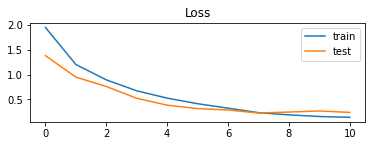

In [64]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

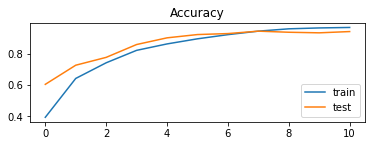

In [65]:
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [66]:
predictions = model.predict(
      x=test_padded
    , batch_size=128
    , verbose=0
) 

In [ ]:
for i in predictions:
    print(i)
    

In [68]:
rounded_predictions = np.argmax(predictions, axis=1)

#for i in rounded_predictions:
    #print(i)

In [39]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
y_test

In [ ]:
for i in y_test:
    print(i)

In [71]:
y_true=np.array(y_test)
y_true[1]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

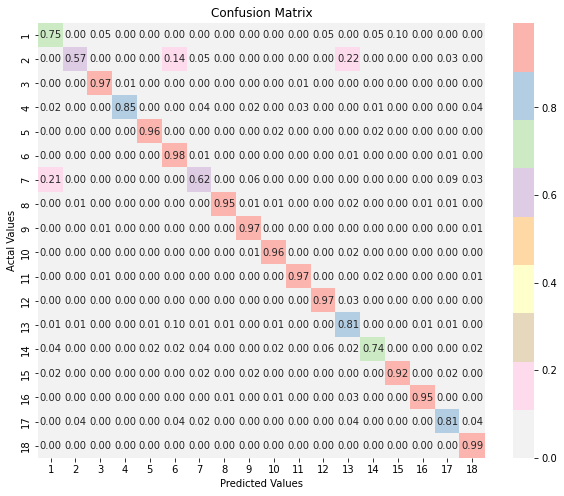

In [72]:
# R Creating  a confusion matrix,which compares the y_test and y_pred

from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, rounded_predictions)

cm = confusion_matrix(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions)

#Normalize
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cmn,
                     index = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'],

                     columns = ['1', '2', '3', '4', '5', '6', '7','8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'])

#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True, fmt= '.2f', cmap='Pastel1_r')   #(cf_matrix/np.sum(cf_matrix), annot=True, 
            #fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [75]:
from sklearn.metrics import classification_report
print(classification_report(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions ))

              precision    recall  f1-score   support

           0       0.48      0.75      0.59        20
           1       0.84      0.57      0.68        37
           2       0.98      0.97      0.98       319
           3       0.94      0.85      0.89       119
           4       0.99      0.96      0.98       184
           5       0.86      0.98      0.92       127
           6       0.60      0.62      0.61        34
           7       0.99      0.95      0.97       196
           8       0.98      0.97      0.97       504
           9       0.96      0.96      0.96       203
          10       0.96      0.97      0.97       190
          11       0.94      0.97      0.96        66
          12       0.74      0.81      0.78        96
          13       0.80      0.74      0.77        47
          14       0.94      0.92      0.93        51
          15       0.97      0.95      0.96        93
          16       0.83      0.81      0.82        47
          17       0.96    

In [76]:
from sklearn.metrics import f1_score

In [77]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average=None)

array([0.58823529, 0.67741935, 0.97637795, 0.89380531, 0.97520661,
       0.91512915, 0.60869565, 0.96875   , 0.9740519 , 0.95802469,
       0.96587927, 0.95522388, 0.7761194 , 0.76923077, 0.93069307,
       0.95652174, 0.8172043 , 0.97651422])

In [78]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='macro')

0.8712823642525422

In [79]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='micro')

0.9395825704870011

In [80]:
f1_score(y_true=np.argmax(y_true, axis=1), y_pred=rounded_predictions, average='weighted')

0.9399465884671031